# NLP Data Mining technic to extract insights 

### Importing Requied Libraries

In [3]:
import numpy as np
import pandas as pd
import os
import json
import glob
import sys

from tqdm.notebook import tqdm #to load files
from copy import deepcopy

import re #used for cleaning data

In [ ]:
# Run in terminal or command prompt
#conda install -c conda-forge spacy

### Saving file path

In [2]:
rootpath = "/Users/rahul/Documents/DataScience/DataScience Models/CORD-19/CORD-19-research-challenge"

In [ ]:
!pwd

### Counting total number of files

In [3]:
count=0
for dirname, _, filenames in os.walk(rootpath):
    for filename in filenames:
        count+=1
print("Total Number of Files:",count)

Total Number of Files: 29319


### Reading Metadata into a data frame

In [4]:
df_md = pd.read_csv("CORD-19-research-challenge/metadata.csv")
df_md.shape

(44220, 15)

In [5]:
df_md.head(5)

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


### Explain what each column in data frame df_md

Now Before going any Further , Let's understand what each columns are and what the value in the columns really mean

Source - It is one of the most important columns of dataset its understanding is critical for our analysis
     CHZ - It stands for CHen Zuckerberg Initiative
     PMC - PUBMed Central is a free full text archieve of biomedical journal literature At US NIH. More can be learned here - https://en.wikipedia.org/wiki/PubMed_Central
     BiorVix And MedrVix - are preprint server for biology which are online platform for publication of paperby Cold Spring Harbour University
Sha - 17K of the paper records have PDFs and the hash of the PDFs are in 'sha'
title - Contains the title of papers
DOI - A DOI, or Digital Object Identifier, is a string of numbers, letters and symbols used to permanently identify an article or document and link to it on the web. A DOI will help your reader easily locate a document from your citation.More can be learned here - https://en.wikipedia.org/wiki/Digital_object_identifier
pmcid and pubmed_id - https://nexus.od.nih.gov/all/2015/08/31/pmid-vs-pmcid-whats-the-difference/
Licence - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4845398/ This articles explains licensing and copyright for scholary articles. It may seem overwhelming at first but you can understand it by thorough reading Rest of the columns can be understood by reading the readme file in the datset

source : (https://www.kaggle.com/tanulsingh077/a-comprehensive-resource-notebook-for-beginners#Extracting-Information-From-JSON-Files)

### Dataframe info 

In [6]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44220 entries, 0 to 44219
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sha                          28462 non-null  object 
 1   source_x                     44220 non-null  object 
 2   title                        43996 non-null  object 
 3   doi                          40750 non-null  object 
 4   pmcid                        23319 non-null  object 
 5   pubmed_id                    22943 non-null  float64
 6   license                      44220 non-null  object 
 7   abstract                     35806 non-null  object 
 8   publish_time                 34197 non-null  object 
 9   authors                      41074 non-null  object 
 10  journal                      33173 non-null  object 
 11  Microsoft Academic Paper ID  964 non-null    float64
 12  WHO #Covidence               1767 non-null   object 
 13  has_full_text   

### Dataframe describe

In [7]:
df_md.describe(include='all')

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
count,28462,44220,43996,40750,23319,2.294300e+04,44220,35806,34197,41074,33173,9.640000e+02,1767,44220,32829
unique,28450,7,42230,40750,23319,NaN,13,35099,7045,39285,3945,NaN,1767,2,4
top,4644c32551fb23aa873a7738ecc8d777bd49877e,PMC,Index,10.1016/j.annals.2010.10.001,PMC3166308,NaN,els-covid,Unknown,2020,"Parry, Jane",PLoS One,NaN,#2880,True,custom_license
freq,4,22309,348,1,1,NaN,19471,654,631,32,1562,NaN,1,28462,20873
mean,NaN,NaN,NaN,NaN,NaN,2.337271e+07,NaN,NaN,NaN,NaN,NaN,2.709918e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7.218084e+06,NaN,NaN,NaN,NaN,NaN,4.839708e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,3.506000e+03,NaN,NaN,NaN,NaN,NaN,3.912630e+07,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.938220e+07,NaN,NaN,NaN,NaN,NaN,2.393002e+09,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.503855e+07,NaN,NaN,NaN,NaN,NaN,3.003251e+09,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.901773e+07,NaN,NaN,NaN,NaN,NaN,3.005639e+09,NaN,NaN,NaN


### Take away points from description

So after intial analysis of our metadata file we can see the following things:-

- There are only 28450 unique articles that means we have duplicate files
- Without the articles I don't see any value in the remaining row. 
- For now I will clean the article duplicate. And decided row with missing articles later preprocessing steps.

### Dropping duplicate papers
Some papers are duplicated since they were collected from separate sources. Thanks Joerg Rings

In [8]:
df_md.drop_duplicates(subset=['sha'], inplace=True)
df_md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28451 entries, 0 to 44219
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sha                          28450 non-null  object 
 1   source_x                     28451 non-null  object 
 2   title                        28407 non-null  object 
 3   doi                          28139 non-null  object 
 4   pmcid                        12811 non-null  object 
 5   pubmed_id                    21560 non-null  float64
 6   license                      28451 non-null  object 
 7   abstract                     24781 non-null  object 
 8   publish_time                 28378 non-null  object 
 9   authors                      27699 non-null  object 
 10  journal                      27557 non-null  object 
 11  Microsoft Academic Paper ID  345 non-null    float64
 12  WHO #Covidence               475 non-null    object 
 13  has_full_text   

In [9]:
df_md.describe(include='all')

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
count,28450,28451,28407,28139,12811,2.156000e+04,28451,24781,28378,27699,27557,3.450000e+02,475,28451,28451
unique,28450,5,28011,28139,12811,NaN,12,24623,6734,26868,3398,NaN,475,2,4
top,af2a0da4beb166ca0b189ee6282120c9b664ea79,Elsevier,Index,10.1016/j.annals.2010.10.001,PMC3166308,NaN,els-covid,Unknown,2016-12-31,"Domingo, Esteban",PLoS One,NaN,#1496,True,custom_license
freq,1,15518,70,1,1,NaN,15518,135,272,14,1557,NaN,1,28450,16851
mean,NaN,NaN,NaN,NaN,NaN,2.331207e+07,NaN,NaN,NaN,NaN,NaN,2.760887e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7.060705e+06,NaN,NaN,NaN,NaN,NaN,4.537696e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2.360400e+04,NaN,NaN,NaN,NaN,NaN,1.191424e+08,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.939912e+07,NaN,NaN,NaN,NaN,NaN,2.747381e+09,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.491966e+07,NaN,NaN,NaN,NaN,NaN,3.003886e+09,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.880063e+07,NaN,NaN,NaN,NaN,NaN,3.005668e+09,NaN,NaN,NaN


### Pritning columns of data frame df_allsources

In [10]:
df_md.columns

Index(['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license',
       'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file'],
      dtype='object')

### Loading the JSON Files
Working with 4 folder of articals in json format

- biorxiv_medrxiv (885)
- pmc_custom_license (16959)
- comm_use_subset (9118)
- noncomm_use_subset (2353)

### Handling json files

Since handling json files are hard. I will be converting them into csv format.

### Functions
- load_files(dirname)
- generate_clean_df(all_files)

In [11]:

#function required 

def load_files(dirname):
    filenames = os.listdir(dirname)
    raw_files = []

    for filename in tqdm(filenames):
        filename = dirname + filename
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    
    return raw_files

def generate_clean_df(all_files):
    cleaned_files = []
    
    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']

    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df.head()
    
    return clean_df

### Functions

- format_name(author)
- format_affiliation(affiliation)
- format_authors(authors, with_affiliation=False)
- format_body(body_text)
- format_bib(bibs)

In [12]:
def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

## biorxiv_medrxiv

In [14]:
bio_dir = '/Users/rahul/Documents/DataScience/DataScience Models/CORD-19/CORD-19-research-challenge/biorxiv_medrxiv/biorxiv_medrxiv/'
bio_files = load_files(bio_dir)
bio_df = generate_clean_df(bio_files)
bio_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,f905f78b32f63c6d14a79984dfb33f1b358b8ab4,Multimerization of HIV-1 integrase hinges on c...,"Meytal Galilee, Akram Alian",Meytal Galilee (Technion -Israel Institute of ...,Abstract\n\nNew anti-AIDS treatments must be c...,"\n\nIn the absence of a curative treatment, th...",HIV drug resistance against strand transfer in...,"[{'first': 'Meytal', 'middle': [], 'last': 'Ga...","{'BIBREF0': {'ref_id': 'b0', 'title': 'HIV dru..."
1,abcfffafab399149d4adadd6bb458c4994e2025d,Time-varying transmission dynamics of Novel Co...,"Tao Liu, Jianxiong Hu, Jianpeng Xiao, Guanhao ...","Tao Liu, Jianxiong Hu, Jianpeng Xiao, Guanhao ...",Abstract\n\nRationale: Several studies have es...,"Introduction\n\nEighteen years ago, severe acu...",World Health Organization. Summary of probable...,"[{'first': 'Tao', 'middle': [], 'last': 'Liu',...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H..."
2,0cb9c296684ca5e71462d825cab2827854a01544,p53 is not necessary for DUX4 pathology,"Darko Bosnakovski, Erik A Toso, Olivia O Recht...","Darko Bosnakovski (Lillehei Heart Institute), ...",Abstract\n\nSummary Statement: DUX4 is thought...,Introduction\n\nFacioscapulohumeral muscular d...,"Trim24 targets endogenous p53 for degradation,...","[{'first': 'Darko', 'middle': [], 'last': 'Bos...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Trim24 ..."
3,9bbfd3d34ee18ea1b9f4669331a6cee9c5992893,Virological assessment of hospitalized cases o...,"Roman Wölfel, Victor M Corman, Wolfgang Guggem...","Roman Wölfel, Victor M Corman, Wolfgang Guggem...","Abstract\n\nemerged in late 2019 1,2 . Initial...","cases, providing proof of active virus replica...",References (01KI1723A) and the European Union ...,"[{'first': 'Roman', 'middle': [], 'last': 'Wöl...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Referen..."
4,1218f278a4f8d83dac14b23c8f698062812ef9d5,Potential impact of seasonal forcing on a SARS...,"Richard A Neher, Robert Dyrdak, Valentin Druel...","Richard A Neher (University of Basel, Basel, S...",Abstract\n\nA novel coronavirus (SARS-CoV-2) f...,\n\n(2.2 with 90% high density interval 1.4-3....,Novel Coronavirus(2019-nCoV) Situation Report ...,"[{'first': 'Richard', 'middle': ['A'], 'last':...","{'BIBREF6': {'ref_id': 'b6', 'title': 'Novel C..."


### Saving dataframe pmc data frame as csv

In [15]:
bio_df.to_csv('clean_bio.csv', index=False)

## pmc_custom_license

In [16]:
pmc_dir = '/Users/rahul/Documents/DataScience/DataScience Models/CORD-19/CORD-19-research-challenge/custom_license/custom_license/'
pmc_files = load_files(pmc_dir)
pmc_df = generate_clean_df(pmc_files)
pmc_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,ab680d5dbc4f51252da3473109a7885dd6b5eb6f,Evolutionary Medicine IV. Evolution and Emerge...,S V Scarpino,"S V Scarpino (Santa Fe Institute, Santa Fe, NM...",,Introduction\n\nThe evolutionary history of hu...,Rapid evolutionary dynamics and disease threat...,"[{'first': 'S', 'middle': ['V'], 'last': 'Scar...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Rapid e..."
1,6599ebbef3d868afac9daa4f80fa075675cf03bc,International aviation emissions to 2025: Can ...,"Andrew Macintosh, Lailey Wallace",Andrew Macintosh (The Australian National Univ...,Abstract\n\nInternational aviation is growing ...,"Introduction\n\nSixty years ago, civil aviatio...",CONSAVE 2050-constrained scenarios on aviation...,"[{'first': 'Andrew', 'middle': [], 'last': 'Ma...","{'BIBREF0': {'ref_id': 'b0', 'title': 'CONSAVE..."
2,eb5c7f3ff921ad6469b79cc8a3c122648204ece4,2 Mechanisms of diarrhoea,"I W Booth, A S Mcneish Baillikre&apos;","I W Booth, A S Mcneish Baillikre&apos;",,INTRODUCTION\n\nAcute infections of the gastro...,A typing scheme for Aeromonas hydrophila based...,"[{'first': 'I', 'middle': ['W'], 'last': 'Boot...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A typin..."
3,b87b790c96c75faa22a085cb560f7b3d8e018b24,Features of Host Cells: Cellular and Molecular...,,,,THE BASIC ORGANIZATION OF THE CELL\n\nThere ar...,Epidemics to eradication: the modern history o...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Epidemi..."
4,68c0bb1989b6ca2b38da32a0d992027db39f80bc,Spring 2020 | 1 Beijing's Hard and Soft Repres...,Victoria Tin-Bor Hui,Victoria Tin-Bor Hui,Abstract\n\nHong Kong's new Police Commissione...,"\n\nIt is also noteworthy that Tang, who was o...",Listed companies appoint mainlanders to boards...,"[{'first': 'Victoria', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Listed ..."


### Saving dataframe pmc data frame as csv

In [17]:
pmc_df.to_csv('clean_pmc.csv', index=False)

## comm_use_subset

In [18]:
com_dir = '/Users/rahul/Documents/DataScience/DataScience Models/CORD-19/CORD-19-research-challenge/comm_use_subset/comm_use_subset/'
com_files = load_files(com_dir)
com_df = generate_clean_df(com_files)
com_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...,"Lang Gong, Ying Lin, Jianru Qin, Qianniu Li, C...","Lang Gong, Ying Lin, Jianru Qin, Qianniu Li, C...",Abstract\n\nBackground: Porcine epidemic diarr...,Background\n\nPorcine epidemic diarrhea virus ...,Porcine epidemic diarrhoea virus: a comprehens...,"[{'first': 'Lang', 'middle': [], 'last': 'Gong...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Porcine..."
1,1579fbff7af9b156c6f49fee0526e48f852ea460,A Recombinant Newcastle Disease Virus (NDV) Ex...,"Edris Shirvani, Anandan Paldurai, Vinoth K Man...","Edris Shirvani (University of Maryland, Colleg...","Abstract\n\nCurrently, live-attenuated IBV vac...","Result\n\nGeneration of rNDVs expressing S1, S...",Avian Infectious Bronchitis. Version adopted b...,"[{'first': 'Edris', 'middle': [], 'last': 'Shi...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Avian I..."
2,f670f4bb6f79e54d7603f8520853b1f0d105b588,,,,,"\n\nShekouh AR, Thompson CC, Prime W, Campbell...",kinase-mediated signaling in genetic stroke su...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'kinase-..."
3,e0668c4b793d0cad26639b070819334a94648123,GP-confirmed complete Achilles tendon rupture ...,"S J Davis, A Lott, E Besada","S J Davis (University of Tromsø, Tromsø, Norwa...",,Introduction\n\nThe incidence of complete Achi...,"Health and travel advice for Hajj pilgrims, Mu...","[{'first': 'S', 'middle': ['J'], 'last': 'Davi...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Health ..."
4,38aa050ad79d8a1d7022c33535255ce9d47914e5,Potent Inhibition of Junín Virus Infection by ...,"C Huang, A G Walker, A M Grant, O A Kolokoltso...","C Huang, A G Walker, A M Grant, O A Kolokoltso...",Abstract\n\nThe new world arenavirus Junín vir...,Introduction\n\nArenaviruses are enveloped RNA...,Arenaviridae: The Viruses and Their Replicatio...,"[{'first': 'C', 'middle': [], 'last': 'Huang',...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Arenavi..."


### Saving dataframe pmc data frame as csv

In [19]:
com_df.to_csv('clean_com.csv', index=False)

## noncomm_use_subset

In [20]:
ncom_dir = '/Users/rahul/Documents/DataScience/DataScience Models/CORD-19/CORD-19-research-challenge/noncomm_use_subset/noncomm_use_subset/'
ncom_files = load_files(ncom_dir)
ncom_df = generate_clean_df(ncom_files)
ncom_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,b2f67d533f2749807f2537f3775b39da3b186051,Caring for persons in detention suffering with...,"Michael Liebrenz, Dinesh Bhugra, Anna Buadze, ...","Michael Liebrenz (University of Bern, Bern, Sw...",,\n\nThere is a disproportionate number of indi...,"Influenza outbreak in a correctional facility,...","[{'first': 'Michael', 'middle': [], 'last': 'L...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Influen..."
1,ad98979eada6e333a276d39efdce21779d538625,Xanthine-based acyclic nucleoside phosphonates...,"Ond Rej Baszczy Nski, Martin Maxmilian Kaiser,...","Ond Rej Baszczy Nski, Martin Maxmilian Kaiser,...",Abstract\n\nWhile noncanonic xanthine nucleoti...,Introduction\n\nThe concentration and ratio of...,Absolute metabolite concentrations and implied...,"[{'first': 'Ond', 'middle': [], 'last': 'Rej B...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Absolut..."
2,464f7d3a460eb51dbc25bd12639b22079a73f85a,Viral lncRNA: A regulatory molecule for contro...,"Ziqiang Wang, Yiwan Zhao, Yaou Zhang","Ziqiang Wang (Tsinghua University, 100084, Bei...",Abstract\n\nLong non-coding RNAs (lncRNAs) are...,Introduction\n\nViruses are important infectio...,"The challenge of viral snRNPs, Cold Spring Har...","[{'first': 'Ziqiang', 'middle': [], 'last': 'W...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The cha..."
3,c436139975d97ef929b5d8452595de40bda0c11c,"Phone: (1) 301-451-9881, jbeigel@niaid.nih.gov","John H Beigel, Pablo Tebas, Marie-Carmelle Eli...","John H Beigel, Pablo Tebas, Marie-Carmelle Eli...",Abstract\n\non behalf of the IRC002 Study Team...,INTRODUCTION\n\nPandemic influenza remains a g...,Meta-analysis: convalescent blood products for...,"[{'first': 'John', 'middle': ['H'], 'last': 'B...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Meta-an..."
4,634128ea7d7736750e1c3cd0a48bb37843d06dac,A Strategy To Estimate Unknown Viral Diversity...,"Simon J Anthony, Jonathan H Epstein, Kris A Mu...","Simon J Anthony, Jonathan H Epstein, Kris A Mu...",Abstract\n\nThe majority of emerging zoonoses ...,"Viral discovery.\n\nA total of 12,793 consensu...",Factors in the emergence of infectious disease...,"[{'first': 'Simon', 'middle': ['J'], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Factors..."


### Saving dataframe pmc data frame as csv

In [21]:
ncom_df.to_csv('clean_ncom.csv', index=False)

### Combining all the json converted csv files into one

In [22]:
os.chdir("/Users/rahul/Documents/DataScience/DataScience Models/CORD-19")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "full_data.csv", index=False, encoding='utf-8-sig')

### Inspecting full_data

In [23]:
full_data = pd.read_csv("full_data.csv")
full_data.shape

(29315, 9)

In [24]:
full_data.head(2)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,ab680d5dbc4f51252da3473109a7885dd6b5eb6f,Evolutionary Medicine IV. Evolution and Emerge...,S V Scarpino,"S V Scarpino (Santa Fe Institute, Santa Fe, NM...",NaN,Introduction\n\nThe evolutionary history of hu...,Rapid evolutionary dynamics and disease threat...,"[{'first': 'S', 'middle': ['V'], 'last': 'Scar...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Rapid e..."
1,6599ebbef3d868afac9daa4f80fa075675cf03bc,International aviation emissions to 2025: Can ...,"Andrew Macintosh, Lailey Wallace",Andrew Macintosh (The Australian National Univ...,Abstract\n\nInternational aviation is growing ...,"Introduction\n\nSixty years ago, civil aviatio...",CONSAVE 2050-constrained scenarios on aviation...,"[{'first': 'Andrew', 'middle': [], 'last': 'Ma...","{'BIBREF0': {'ref_id': 'b0', 'title': 'CONSAVE..."


In [25]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29315 entries, 0 to 29314
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          29315 non-null  object
 1   title             25732 non-null  object
 2   authors           26029 non-null  object
 3   affiliations      26029 non-null  object
 4   abstract          21264 non-null  object
 5   text              29315 non-null  object
 6   bibliography      29315 non-null  object
 7   raw_authors       29315 non-null  object
 8   raw_bibliography  29315 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [26]:
full_data.describe(include="all")

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
count,29315,25732,26029,26029,21264,29315,29315,29315,29315
unique,29315,25113,25206,25576,21049,29118,29045,25609,29052
top,af2a0da4beb166ca0b189ee6282120c9b664ea79,Original Article,Ming-Hsiang Chen,"Pharmac, Ther",Abstract\n\nPLOS ONE |\n\n,"Dear Editor,\n\nIn previous reports, workers h...",Estudio Nacional de la Infección Respiratoria ...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Rare ho..."
freq,1,38,6,6,5,4,4,3286,4


### metadata vs full_data columns

In [27]:
metadata_columns = df_md.columns
print(metadata_columns)
full_columns = full_data.columns
print(full_columns)

Index(['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license',
       'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file'],
      dtype='object')
Index(['paper_id', 'title', 'authors', 'affiliations', 'abstract', 'text',
       'bibliography', 'raw_authors', 'raw_bibliography'],
      dtype='object')


In [28]:
metadata_head = df_md.head(2)
print(metadata_columns)
full_head = full_data.head(2)
print(full_columns)

Index(['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license',
       'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file'],
      dtype='object')
Index(['paper_id', 'title', 'authors', 'affiliations', 'abstract', 'text',
       'bibliography', 'raw_authors', 'raw_bibliography'],
      dtype='object')


### Name change of coumns from df_md data frame to avoid confution before we join both the data frames

In [29]:
df_md = df_md.rename(columns = {"abstract":"abstract_meta"}) 
df_md = df_md.rename(columns = {"authors":"authors_meta"}) 
df_md = df_md.rename(columns = {"title":"title_meta"}) 
df_md = df_md.rename(columns = {"sha":"paper_id"}) 


df_md.columns

Index(['paper_id', 'source_x', 'title_meta', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract_meta', 'publish_time', 'authors_meta', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file'],
      dtype='object')

## Joining df_md and full_data dataframes

Will be using right outer join as the information on the full_data is more important


In [30]:
combined = pd.merge(df_md, full_data, on='paper_id', how='right')

In [31]:
combined.shape

(29315, 23)

In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29315 entries, 0 to 29314
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   paper_id                     29315 non-null  object 
 1   source_x                     27678 non-null  object 
 2   title_meta                   27634 non-null  object 
 3   doi                          27368 non-null  object 
 4   pmcid                        12074 non-null  object 
 5   pubmed_id                    20818 non-null  float64
 6   license                      27678 non-null  object 
 7   abstract_meta                24045 non-null  object 
 8   publish_time                 27606 non-null  object 
 9   authors_meta                 26929 non-null  object 
 10  journal                      26784 non-null  object 
 11  Microsoft Academic Paper ID  297 non-null    float64
 12  WHO #Covidence               422 non-null    object 
 13  has_full_text   

In [33]:
combined.describe(include="all")

,paper_id,source_x,title_meta,doi,pmcid,pubmed_id,license,abstract_meta,publish_time,authors_meta,...,has_full_text,full_text_file,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
count,29315,27678,27634,27368,12074,2.081800e+04,27678,24045,27606,26929,...,27678,27678,25732,26029,26029,21264,29315,29315,29315,29315
unique,29315,5,27248,27368,12074,NaN,12,23888,6655,26110,...,1,4,25113,25206,25576,21049,29118,29045,25609,29052
top,af2a0da4beb166ca0b189ee6282120c9b664ea79,Elsevier,Index,10.1016/j.annals.2010.10.001,PMC3166308,NaN,els-covid,Unknown,2016-12-31,"Domingo, Esteban",...,True,custom_license,Original Article,"Pharmac, Ther","Pharmac, Ther",Abstract\n\nPLOS ONE |\n\n,"Dear Editor,\n\nIn previous reports, workers h...",Rare homologous recombination in H3N2 avian in...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Rare ho..."
freq,1,15510,70,1,1,NaN,15510,135,272,14,...,27678,16750,38,6,6,5,4,4,3286,4
mean,NaN,NaN,NaN,NaN,NaN,2.316095e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7.102153e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2.360400e+04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.919383e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.474540e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.869597e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
combined.head(1)

,paper_id,source_x,title_meta,doi,pmcid,pubmed_id,license,abstract_meta,publish_time,authors_meta,...,has_full_text,full_text_file,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",...,True,custom_license,Clinical and Immunologic Studies in Identical ...,"Carolyn M Brunner, A David, Horwitz, K Mary, ...","Carolyn M Brunner (University of Virginia, Cha...",Abstract\n\nMiddle-aged female identical twins...,"\n\nThe patient (Fo, ) was a 58 year old menta...",Hereditary hypergammaglobulinemia and systemic...,"[{'first': 'Carolyn', 'middle': ['M'], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Heredit..."


### Imputing 

Imputing missing title, abstract & authors with title_meta, abstract_meta & authors_meta

In [35]:
combined.authors = np.where(combined.authors.isnull(), combined.authors_meta, combined.authors)
combined.title = np.where(combined.title.isnull(), combined.title_meta, combined.title)
combined.abstract = np.where(combined.abstract.isnull(), combined.abstract_meta, combined.abstract)

In [36]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29315 entries, 0 to 29314
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   paper_id                     29315 non-null  object 
 1   source_x                     27678 non-null  object 
 2   title_meta                   27634 non-null  object 
 3   doi                          27368 non-null  object 
 4   pmcid                        12074 non-null  object 
 5   pubmed_id                    20818 non-null  float64
 6   license                      27678 non-null  object 
 7   abstract_meta                24045 non-null  object 
 8   publish_time                 27606 non-null  object 
 9   authors_meta                 26929 non-null  object 
 10  journal                      26784 non-null  object 
 11  Microsoft Academic Paper ID  297 non-null    float64
 12  WHO #Covidence               422 non-null    object 
 13  has_full_text   

### Dropping unnecessary

In [37]:
combined.head(1)

,paper_id,source_x,title_meta,doi,pmcid,pubmed_id,license,abstract_meta,publish_time,authors_meta,...,has_full_text,full_text_file,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",...,True,custom_license,Clinical and Immunologic Studies in Identical ...,"Carolyn M Brunner, A David, Horwitz, K Mary, ...","Carolyn M Brunner (University of Virginia, Cha...",Abstract\n\nMiddle-aged female identical twins...,"\n\nThe patient (Fo, ) was a 58 year old menta...",Hereditary hypergammaglobulinemia and systemic...,"[{'first': 'Carolyn', 'middle': ['M'], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Heredit..."


In [38]:
combined = combined.drop(['title_meta', 'abstract_meta','authors_meta', 'Microsoft Academic Paper ID','WHO #Covidence', 'has_full_text','raw_authors','raw_bibliography'], axis = 1)
combined.columns

Index(['paper_id', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license',
       'publish_time', 'journal', 'full_text_file', 'title', 'authors',
       'affiliations', 'abstract', 'text', 'bibliography'],
      dtype='object')

In [39]:
combined.shape

(29315, 15)

### exporting the data frame into csv

In [40]:
combined.to_csv('combined.csv', index=False)

### Exporting csv file to new data frame

In [5]:
df = pd.read_csv("combined.csv")

## Spliting data into half
As my system was crashing repetedly. I have decided to split the data and run the model

In [6]:
from sklearn.model_selection import train_test_split

# test set size of 50% of the data and the random seed 3 <3
X_df, Y_df = train_test_split(df, test_size=0.7, random_state=6)

print("X_df size:", len(X_df))
print("Y_df size:", len(Y_df), "\n")

X_df size: 8794
Y_df size: 20521 



In [7]:
X_df.shape

(8794, 15)

### Creating a new data frame for the text

In [8]:
corpus = X_df.text

In [9]:
corpus[0][:500]

'\n\nThe patient (Fo, ) was a 58 year old mentally retarded white woman, born in a rural area of southwestern Virginia.In July 1967 she was referred to the University of Virginia Hospital (UVH) because of edema of the legs and facial swelling of recent onset. She admitted having arthralgias but denied having recent rash, pleurisy or hair loss. Previous medical history revealed that a systolic heart murmur had been heard in 1962. A hemogram and urinalysis at that time were normal. In June 1963 she h'

## Cleaning corpus

###### Converting corpus into list

In [10]:
# Convert to list
corpus = corpus.values.tolist()

In [18]:
corpus[0][:500]

'Introduction\n\nTourism crises and disasters are not new phenomena. The media is replete with negative reports of well (and lesser)-known examples of events such terrorist attacks, natural disasters, political instability, outbreak of war, economic recession, biosecurity, disease threats and other negative events that threaten the tourism industry. As reported by Ritchie (2008) , whatever the source of these negative events, the subsequent decrease in international tourist arrivals may have a sign'

###### Remaving emails

In [11]:
# Remove Emails
corpus = [re.sub('\S*@\S*\s?', '', sent) for sent in corpus]

###### Removing new line characters

In [12]:
# Remove new line characters
corpus = [re.sub('\s+', ' ', sent) for sent in corpus]

###### Removing single quotes

In [13]:
# Remove distracting single quotes
corpus = [re.sub("\'", "", sent) for sent in corpus]

###### Removing numerics in [ ] brackets

In [14]:
corpus = [re.sub("[\\[].*?[\\]]", "", sent) for sent in corpus]

In [15]:
corpus[0][:500]

'Introduction Tourism crises and disasters are not new phenomena. The media is replete with negative reports of well (and lesser)-known examples of events such terrorist attacks, natural disasters, political instability, outbreak of war, economic recession, biosecurity, disease threats and other negative events that threaten the tourism industry. As reported by Ritchie (2008) , whatever the source of these negative events, the subsequent decrease in international tourist arrivals may have a signi'

## Tokenization

In [ ]:
#creating a new df
corpus_t = corpus.copy()

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
corpus_t = list(sent_to_words(corpus_t))

print(corpus_t[:1])

## ktrain

In [ ]:
#pip install transformers==2.4.1 run this only when tokenizer does not intall in ktrain

In [50]:
pip install ktrain 

Note: you may need to restart the kernel to use updated packages.


In [16]:
import ktrain
ktrain.__version__

'0.11.3'

#### Train an LDA Topic Model to Discover Topics

The get_topic_model function learns a topic model using Latent Dirichlet Allocation (LDA).

Latent Dirichlet Allocation (LDA) is a generative, probabilistic model for a collection of documents, which are represented as mixtures of latent topics, where each topic is characterized by a distribution over words.

In more detail, LDA represents documents as mixtures of topics that spit out words with certain probabilities. It assumes that documents are produced in the following fashion: when writing each document, you

Overview of how the algorithm works
Assumption: We are assuming that all topic assignments except for the current word in question are correct, and update the assignment of the current word using our model on every iteration.
Suppose we have a collection of documents and we want to learn `K` topics out of them.
We will go through each document (d).
Then for each word (w) in the document we will calculate the following:-
X = p(topic | document) = the proportion of words in document d that are currently assigned to topic t.
Y = p(word w | topic t) = the proportion of assignments to topic t over all documents that come from this word w. (The same word can be in multiple documents, hence its coverage over the documents)
3. X * Y is essentially the probability that topic `t` generated word `w`, so it makes sense that we re-sample the current word’s topic with this probability.
After repeating these steps for large enough number of times, we will get pretty good topic assignments, such that they generate words describing the documents.
If you want to dive more into the algorithm, here is the link for a detailed tutorial. You will find Natural Language Processing section with a sub-section of Topic modelling in which you will be able to learn more about LDA.
Two important parameters of the algorithm are:
Topic concentration / Beta
Document concentration / Alpha



Source : 
- (https://www.quora.com/What-is-a-good-explanation-of-Latent-Dirichlet-Allocation)

- (https://appliedmachinelearning.blog/2017/09/28/topic-modelling-part-2-discovering-topics-from-articles-with-latent-dirichlet-allocation/)

- (https://medium.com/@pratikbarhate/latent-dirichlet-allocation-for-beginners-a-high-level-intuition-23f8a5cbad71)

- (https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)

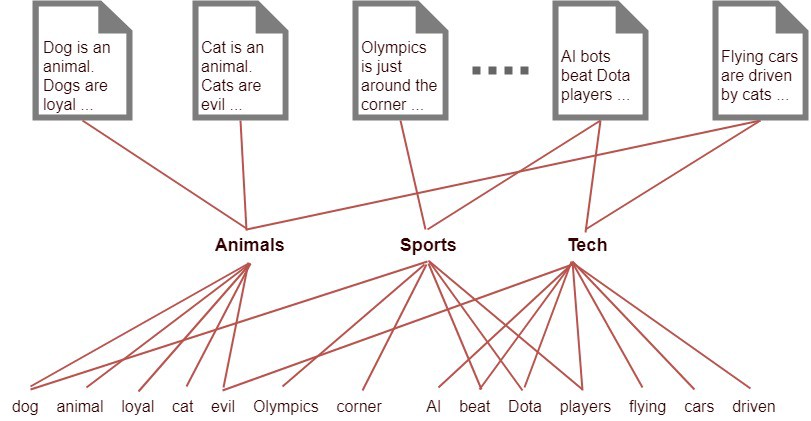

In [21]:
from IPython.display import Image
Image(filename='LDA.jpeg') 

Words are modeled by a set of topics and documents are modeled by a set of topics. The relationships are clearer than the first example because there’s a fewer connections than the first example.

In [17]:
%%time
tm = ktrain.text.get_topic_model(corpus, n_features=10000)

n_topics automatically set to 66
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
CPU times: user 9min 1s, sys: 5.23 s, total: 9min 6s
Wall time: 2min 44s



We can examine the discovered topics using print_topics, get_topics, or topics.

Here, we will use print_topics:

In [18]:
tm.print_topics()

topic 0 | cattle bovine animals herds nasal herd sheep calves fmdv bvdv
topic 1 | surveillance search hamsters systems users google codes internet online flu
topic 2 | substitutions analogs hrc lactam l/min benign ala increasing behaviors involving
topic 3 | der die und bei von mit eine ist werden sind
topic 4 | model models fig values population distribution network parameters probability individuals
topic 5 | rna replication translation sequence mrna genome rnas synthesis transcription dna
topic 6 | los que las del por una para pacientes como son
topic 7 | vacuoles icv vacuole vacuolation tracts coordinates ammonia red perspective ggt
topic 8 | sequences sequence genome gene strains sequencing genetic genomes amino genes
topic 9 | cargo exosomes gp350 exosome vesicles figure ebv autologous malignant origin
topic 10 | fig expression min incubated figure assay pbs antibody medium buffer
topic 11 | care fig blood gene drug public water genes services rna
topic 12 | resistance bacterial 

###### Compute the Document-Topic Matrix

In [19]:
%%time
tm.build(corpus, threshold=0.25)

done.
CPU times: user 1min 30s, sys: 242 ms, total: 1min 31s
Wall time: 46.1 s


Since the build method prunes documents based on threshold, we should prune the original data and any metadata in a similar way for consistency. This can be accomplished with the filter method.

In [20]:
corpus = tm.filter(corpus)
X_df = tm.filter(X_df)

This is useful to ensure all data and metadata are aligned with the same array indices in case we want to use them later (e.g., in visualizations, for example).

In [21]:
tm.visualize_documents(doc_topics=tm.get_doctopics())

reducing to 2 dimensions...[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8034 samples in 0.021s...
[t-SNE] Computed neighbors for 8034 samples in 7.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8034
[t-SNE] Computed conditional probabilities for sample 2000 / 8034
[t-SNE] Computed conditional probabilities for sample 3000 / 8034
[t-SNE] Computed conditional probabilities for sample 4000 / 8034
[t-SNE] Computed conditional probabilities for sample 5000 / 8034
[t-SNE] Computed conditional probabilities for sample 6000 / 8034
[t-SNE] Computed conditional probabilities for sample 7000 / 8034
[t-SNE] Computed conditional probabilities for sample 8000 / 8034
[t-SNE] Computed conditional probabilities for sample 8034 / 8034
[t-SNE] Mean sigma: 0.085096
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.263542
[t-SNE] KL divergence after 1000 iterations: 1.382996
done.


Loading BokehJS ...

###### Inspect and Visualize Topics

Let's list the topics by document count:

In [22]:
tm.print_topics(show_counts=True)

topic:10 | count:772 | fig expression min incubated figure assay pbs antibody medium buffer
topic:14 | count:443 | public countries global international national systems states world need united
topic:8 | count:426 | sequences sequence genome gene strains sequencing genetic genomes amino genes
topic:62 | count:413 | expression ifn activation immune signaling mice production innate activity responses
topic:4 | count:401 | model models fig values population distribution network parameters probability individuals
topic:29 | count:366 | detection pcr assay sample dna rna assays sensitivity rt-pcr amplification
topic:33 | count:354 | patients patient age hospital mortality mean admission included median day
topic:65 | count:346 | vaccine mice antibodies vaccines antibody immune responses antigen vaccination neutralizing
topic:58 | count:291 | sars outbreak transmission patients contact epidemic outbreaks symptoms hospital period
topic:41 | count:268 | proteins membrane fusion domain binding

###### Train a Document Recommender

In [23]:
tm.train_recommender()

###### Generate Recommendations

Given some text, recommend documents that are semantically relevant to it.

In [24]:
task_1 = """  What is known about covid-19 transmission?    """

In [26]:
for i, doc in enumerate(tm.recommend(text=task_1, n=5)):
    print('RESULT #%s'% (i+1))
    print('TEXT:\n\t%s' % (" ".join(doc[0].split()[:500])))
    print()

RESULT #1
TEXT:
	a b s t r a c t One of the most perplexing questions regarding the current COVID-19 coronavirus epidemic is the discrepancy between the severity of cases observed in the Hubei province of China and those occurring elsewhere in the world. One possible answer is antibody dependent enhancement (ADE) of SARS-CoV-2 due to prior exposure to other coronaviruses. ADE modulates the immune response and can elicit sustained inflammation, lymphopenia, and/or cytokine storm, one or all of which have been documented in severe cases and deaths. ADE also requires prior exposure to similar antigenic epitopes, presumably circulating in local viruses, making it a possible explanation for the observed geographic limitation of severe cases and deaths.© 2020 Institut Pasteur. Published by Elsevier Masson SAS. All rights reserved.There are numerous questions regarding the nature of the current COVID-19 epidemic. One of the most perplexing happens to be the significant discrepancy of serious 

In [27]:
task_2 =  """ What is known about covid-19 incubation period?   """

In [32]:
print(tm.recommend(text=task_2, n=1)[0][0])

Dear Editor, Since December 2019, an outbreak of infection with the novel coronavirus (SARS- has developed in Wuhan, China, and has spread through the country 1, 2 . The first confirmed imported case of SARS-CoV-2 infection was reported on Jan 21 in Qingdao, Shandong 3 . Here, we present the only case with SARS-CoV-2 infection during pregnancy in Qingdao.On Feb 4, a 31-year-old female at 30 weeks gestation presented with mild diarrhea (2-3 times a day) for one day. She was afebrile and breathing normally, and did not have cough or chest pain. On Jan 22, she has the contact history with Hubei province relatives, her mother and On day 2 of hospitalization, the patient received supportive therapies. Aerosolized interferon inhalation 5,000,000 IU bid and lopinavir and ritonavir 2 tablets bid were added from Feb 7. On Feb 11, CT showed a significant resolution of the initial lung abnormalities while the patient was receiving therapy (Fig 1. C and D) . On Feb 13, two-repeated nasopharyngeal 

###### Conclusion

It is very difficult to analyze the results. The “topics” just spit out some random words. This is one of the drawbacks of the algorithm, that we have to go through many trial and errors. It is tough to draw insights from the outputs. We would need some domain expert for a feedback, to decide whether the results are better suited for a particular use-case or not. We can use Kullback–Leibler divergence score to decide the value of k (Number of topics as the output).
The algorithm does shorten the large collection of documents to some commonly occurring words or phrases, grouped together according to the usage (these groups are called topics). You can leverage this property of the algorithm towards your use-cases.

Reference : (https://medium.com/@pratikbarhate/latent-dirichlet-allocation-for-beginners-a-high-level-intuition-23f8a5cbad71)

### As we have full articles for all the file. I will not be checking for length of the documents 